# Лабораторная работа №5.1.1
# По теме: "Экспериментальная проверка уравнения Эйнштейна для фотоэффекта и определение постоянной Планка"

### Выполнял: Дмитрий Дроздов Б01-908, Быков Алексей Б01-908
---

***Цель работы:***
Исследовать зависимость фототока от величины задерживающего потенциала и частоты падающего излучения; Определить постоянную Планка и оценить погрешность результата. 

***Оборудование:***

Схема установки:

![Рис.1.Схема установки](scheme.jpg)

***Теоретическое введение:***

_Фотоэффект_ - испускание электронов фотокатодом, облучаемым светом. Это явление обьясняется фотонной теоией света: фотон с энергией $ \hbar \omega $ выбивает электрон из поверхности металла. Энергетический баланс для вылетающих электронов описываются уравнением 
$$ \hbar\omega = E_{max} + W $$
Где $ E_{max} $ - максимальная кинетическая энергия электрона после выхода из фотокатода, $ W $ - работа выхода электрона из катода. 
$ E_{max} = eV_0 $ - где $ V_0 $ - потенциал запирания. Подставив это в формулу выше, получаем уравнение Эйнштейна 
$$ eV_0 = \hbar\omega + W $$ 

Зависимость фототока от напряжения на аноде:

![V](V.jpg)

---
## Выполнение работы


1. Проградуируем барабан монохроматора по спектру неоновой лампы и посторим градуировочную кривую.            

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.constants as spc

graduation = pd.read_excel('1.1.XLSX', sheet_name='Градуировка монохроматора', index_col=[3], na_filter= False)
print(graduation.to_markdown(index=False))

|   спектр, N |   барабан |   длина волны, A |
|------------:|----------:|-----------------:|
|           1 |      2546 |          7032.41 |
|           2 |      2518 |          6929.47 |
|           3 |      2450 |          6717.04 |
|           4 |      2440 |          6678.28 |
|           5 |      2410 |          6598.95 |
|           6 |      2386 |          6532.88 |
|           7 |      2376 |          6506.53 |
|           8 |      2340 |          6402.24 |
|           9 |      2334 |          6382.99 |
|          10 |      2320 |          6334.42 |
|          11 |      2307 |          6304.79 |
|          12 |      2290 |          6266.49 |
|          13 |      2268 |          6217.28 |
|          14 |      2250 |          6163.59 |
|          15 |      2236 |          6143.06 |
|          16 |      2228 |          6096.14 |
|          17 |      2208 |          6074.34 |
|          18 |      2190 |          6030    |
|          19 |      2162 |          5975.53 |
|          20

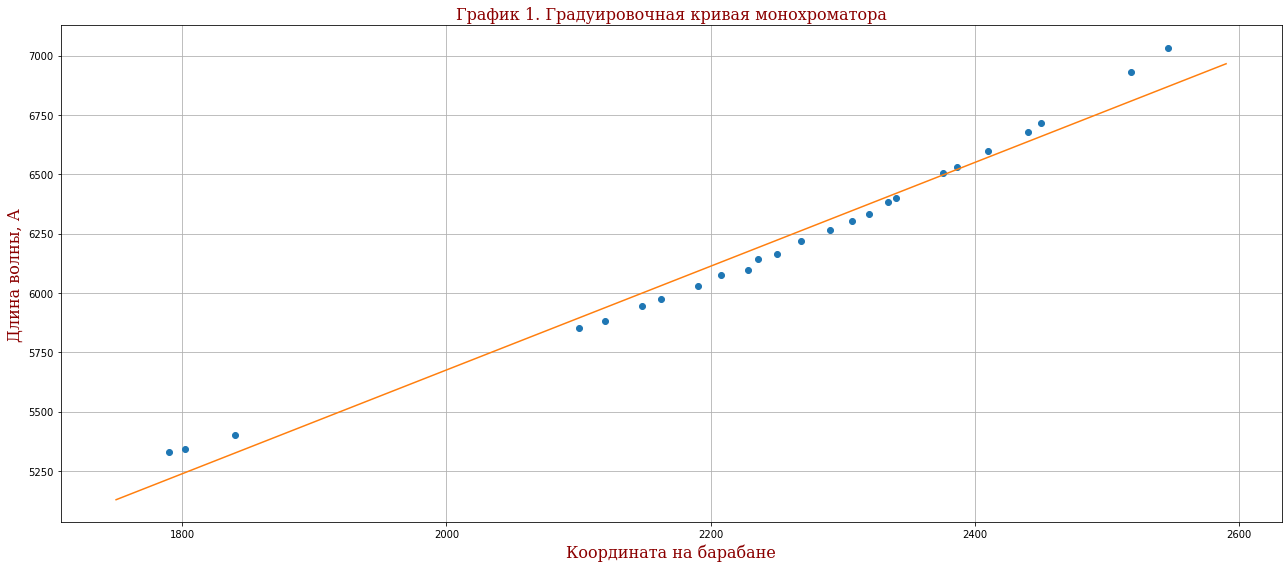

y = (2.19 +- 0.07) * x + (1301 +- 160)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

gradLine = np.polyfit(graduation['барабан'].tolist(), graduation['длина волны, A'].tolist(), 1)
x = np.arange(start=1750, stop=2600, step=10)

plt.figure(figsize=[18, 8])
plt.grid()
plt.title("График 1. Градуировочная кривая монохроматора", fontdict=font)
plt.ylabel('Длина волны, А', fontdict=font)
plt.xlabel('Координата на барабане', fontdict=font)
plt.plot(graduation['барабан'].tolist(), graduation['длина волны, A'].tolist(), 'o')
plt.plot(x, list(map(lambda x: gradLine[0]*x + gradLine[1], x)))
plt.tight_layout()
plt.show()

print("y = (",round(gradLine[0], 2), " +- 0.07) * x + (", round(gradLine[1]), " +- 160)", sep='')

Прямая проведена методом наименьших квадратов. $ y = ax + b $
$$ a = \frac{<yx> - <x><y>}{<x^2> - <x>^2}  $$
$$ b = <y> - a<x> $$
$$ \sigma_a = \frac{1}{\sqrt{n}}\sqrt{\frac{<y^2>-<y>^2}{<x^2>-<x>^2} - a^2} $$
$$ \sigma_b = \sigma_a\sqrt{<x^2> - <x>^2} $$
2. Снимем зависимость тока от напряжения для разных частот излучения.

In [3]:
measurements = pd.read_excel(os.path.abspath('1.1.XLSX'), sheet_name='Измерения', index_col=np.arange(start=19, stop=19), na_filter= False)
#gradLine[0]*measure1.f + gradLine[1]
measurements.loc[0, 'f1, A'] = round(gradLine[0]*measurements.loc[0, 'f1, A'] + gradLine[1])
measurements.loc[0, 'f2, A'] = round(gradLine[0]*measurements.loc[0, 'f2, A'] + gradLine[1])
measurements.loc[0, 'f3, A'] = round(gradLine[0]*measurements.loc[0, 'f3, A'] + gradLine[1])
measurements.loc[0, 'f4, A'] = round(gradLine[0]*measurements.loc[0, 'f4, A'] + gradLine[1])
measurements.loc[0, 'f5, A'] = round(gradLine[0]*measurements.loc[0, 'f5, A'] + gradLine[1])
print(measurements.to_markdown(index=False))

| f1, A   |     V1 |    I1 | f2, A   |     V2 |    I2 | f3, A   |     V3 |    I3 | f4, A   |     V4 |    I4 | f5, A   |     V5 |    I5 |
|:--------|-------:|------:|:--------|-------:|------:|:--------|-------:|------:|:--------|-------:|------:|:--------|-------:|------:|
| 5325    |  7.422 | 0.585 | 5621    |  7.368 | 0.595 | 5916    |  7.425 | 0.605 | 6211    |  7.434 | 0.611 | 6507    |  7.435 | 0.612 |
|         |  6.003 | 0.569 |         |  5     | 0.563 |         |  5.005 | 0.573 |         |  5     | 0.577 |         |  5     | 0.574 |
|         |  2.001 | 0.464 |         |  2     | 0.469 |         |  2.005 | 0.483 |         |  2     | 0.482 |         |  2     | 0.473 |
|         |  1.001 | 0.341 |         |  1     | 0.345 |         |  1.001 | 0.375 |         |  1     | 0.375 |         |  1     | 0.344 |
|         |  0.501 | 0.207 |         |  0.662 | 0.256 |         |  0.657 | 0.277 |         |  0.66  | 0.281 |         |  0.664 | 0.245 |
|         |  0.103 | 0.11  |         |  0

In [4]:
# получение информации из таблиц для обработки
specN = graduation['спектр, N'].tolist()
baraban = graduation['барабан'].tolist()
valve = graduation['длина волны, A'].tolist()
slotWidth = 0.05

In [5]:
import math
class Measure:
    f = 0
    V = []
    I = []
    
    def __init__(self, inf, inV, inI):
        self.f = inf
        self.V = inV
        self.I = inI

measure1 = Measure(measurements['f1, A'].tolist()[0], measurements['V1'].tolist(), measurements['I1'].tolist())
measure2 = Measure(measurements['f2, A'].tolist()[0], measurements['V2'].tolist(), measurements['I2'].tolist())
measure3 = Measure(measurements['f3, A'].tolist()[0], measurements['V3'].tolist(), measurements['I3'].tolist())
measure4 = Measure(measurements['f4, A'].tolist()[0], measurements['V4'].tolist(), measurements['I4'].tolist())
measure5 = Measure(measurements['f5, A'].tolist()[0], measurements['V5'].tolist(), measurements['I5'].tolist())

measure1.I = list(map(lambda x: math.sqrt(x), measure1.I))
measure2.I = list(map(lambda x: math.sqrt(x), measure2.I))
measure3.I = list(map(lambda x: math.sqrt(x), measure3.I))
measure4.I = list(map(lambda x: math.sqrt(x), measure4.I))
measure5.I = list(map(lambda x: math.sqrt(x), measure5.I))

line1 = np.polyfit(measure1.V[4:], measure1.I[4:], 1)
line2 = np.polyfit(measure2.V[4:], measure2.I[4:], 1)
line3 = np.polyfit(measure3.V[4:], measure3.I[4:], 1)
line4 = np.polyfit(measure4.V[4:], measure4.I[4:], 1)
line5 = np.polyfit(measure5.V[4:], measure5.I[4:], 1)

y = np.arange(start=0, stop=0.9, step=0.1)

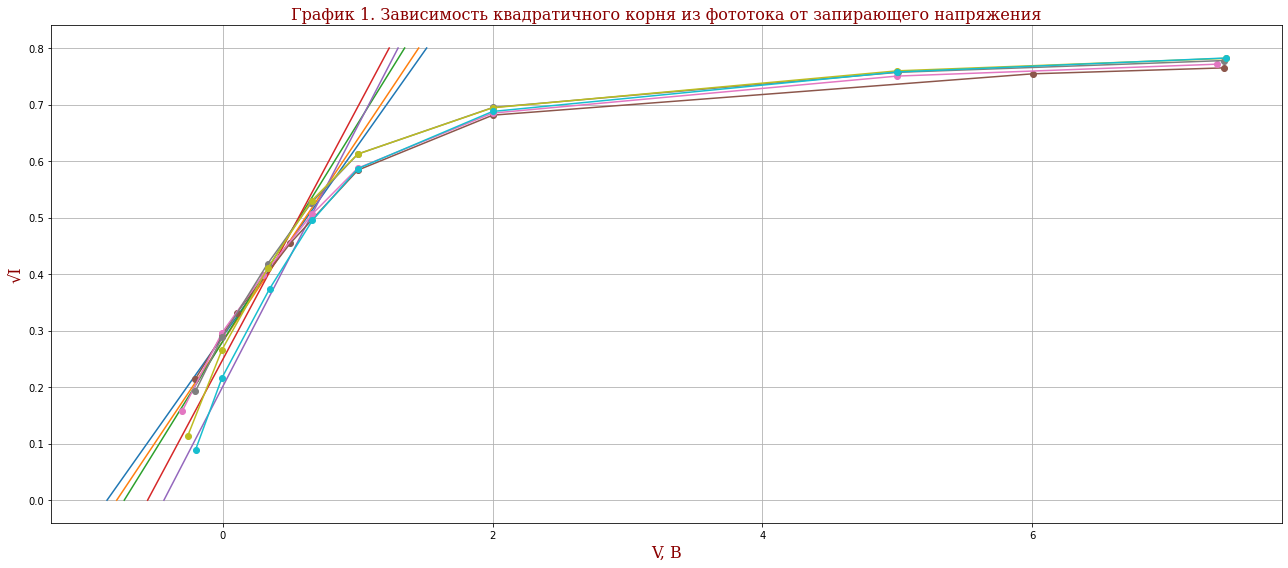

In [6]:
plt.figure(figsize=[18, 8])
plt.grid()
plt.title("График 1. Зависимость квадратичного корня из фототока от запирающего напряжения", fontdict=font)
plt.ylabel('√I', fontdict=font)
plt.xlabel('V, B', fontdict=font)

plt.plot(list(map(lambda y: (y - line1[1]) / line1[0], y)), y)
plt.plot(list(map(lambda y: (y - line2[1]) / line2[0], y)), y)
plt.plot(list(map(lambda y: (y - line3[1]) / line3[0], y)), y)
plt.plot(list(map(lambda y: (y - line4[1]) / line4[0], y)), y)
plt.plot(list(map(lambda y: (y - line5[1]) / line5[0], y)), y)

plt.plot(measure1.V, measure1.I, 'o-')
plt.plot(measure2.V, measure2.I, 'o-')
plt.plot(measure3.V, measure3.I, 'o-')
plt.plot(measure4.V, measure4.I, 'o-')
plt.plot(measure5.V, measure5.I, 'o-')
plt.tight_layout()
plt.show()

4. Построим зависимость $ V_0(\omega) $, где $ \omega = 2\pi\frac{c}{\lambda} $

$ V_0 $ получаем, подставив $I = 0$ в уравнение апрксимированой прямой. 

Для получения частоты $\omega$, сначала переведем координаты на барабане в соответствующую длину волны.

|   V0, B |   w*10^15, 1/c |
|--------:|---------------:|
|    0.86 |           3.54 |
|    0.79 |           3.35 |
|    0.73 |           3.19 |
|    0.56 |           3.03 |
|    0.44 |           2.9  |


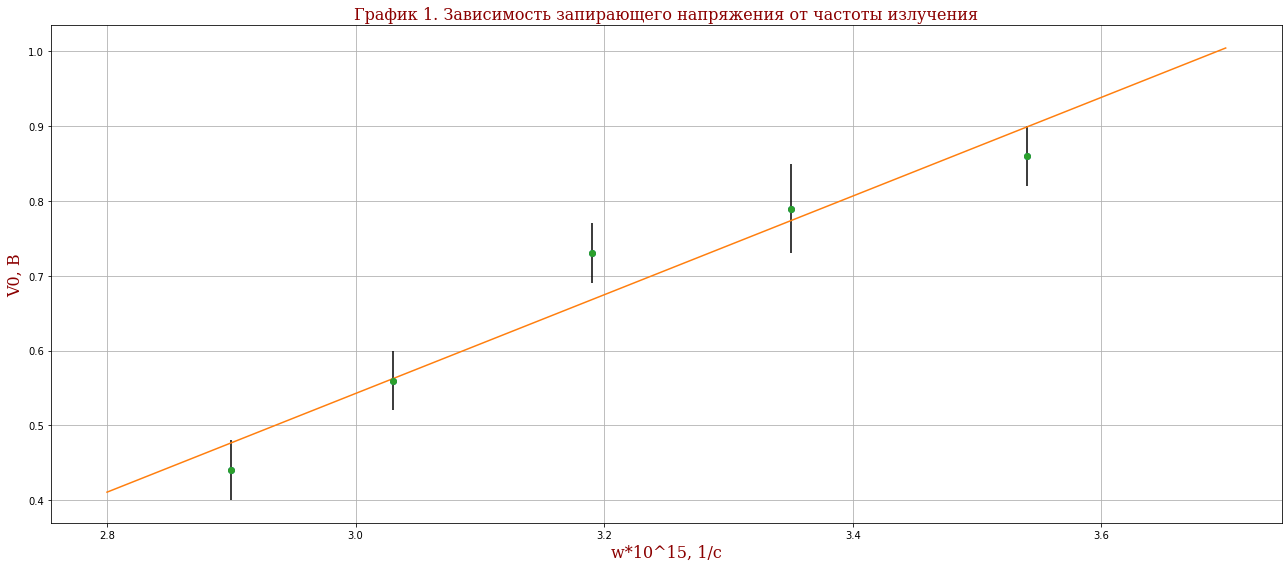

In [7]:
V0 = [ -line1[1] / line1[0], -line2[1] / line2[0], -line3[1]/line3[0], -line4[1]/line4[0], -line5[1]/line5[0] ]
# Перевод из координат на барабане в длину волны
f = [ measure1.f, measure2.f, measure3.f, measure4.f, measure5.f ]
# это в 10^15 размерности
f = list(map(lambda x_tmp: round(2 * np.pi * 3 * 1000 / x_tmp, 2), f))
V0 = list(map(lambda x_t: round(-x_t, 2), V0))
print(pd.DataFrame({ 'V0, B': V0, 'w*10^15, 1/c': f }).to_markdown(index=False))

V0_f_poly = np.polyfit(f, V0, 1)
x = np.arange(start=2.8, stop=3.8, step=0.1)

plt.figure(figsize=[18, 8])
plt.grid()
plt.title("График 1. Зависимость запирающего напряжения от частоты излучения", fontdict=font)
plt.ylabel('V0, B', fontdict=font)
plt.xlabel('w*10^15, 1/c', fontdict=font)
plt.plot(f, V0, 'o')
plt.plot(x, list(map(lambda x_t: x_t * V0_f_poly[0] + V0_f_poly[1], x)))

yerr = [ 0.04, 0.06, 0.04, 0.04, 0.04 ]
plt.errorbar(f, V0, yerr=yerr, fmt='o', ecolor='black')
plt.tight_layout()
plt.show()

Из уравнения прямой получаем постоянну Планка. $ \frac{dV_0}{d\omega} = \frac{\hbar}{e} = k $ => $ \hbar = ek $, $ \delta\hbar = \hbar\frac{\delta b}{b} $ 

Сравним с табличным значением.

In [8]:
print("h: (", round(V0_f_poly[0] * spc.e * 10**19, 2), "+- 0.1 ) * 10^(-34) Дж*с")
print("h table:", spc.hbar, "Дж*с")

h: ( 1.06 +- 0.1 ) * 10^(-34) Дж*с
h table: 1.0545718176461565e-34 Дж*с


# Вывод

На основе полученных данных была получена постоянная Планка. Найденное значение лежит в пределах погрешности.